<img src="./img/HWNI_logo.svg"/>

# Lab 04 - One-Way ANOVA

In [1]:
# makes our plots show up inside Jupyter
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats

# choose colors that work for most color-blind folks
sns.set_palette("colorblind")
sns.set(color_codes=True)

import util.lab04utils as utils 

# this makes our tables easier to read
utils.formatDataframes()

## About the Dataset

For this week's lab, we'll be using some EEG data graciously provided by the [Voytek lab](http://voyteklab.com/about-us/) of UCSD. Participants of varying ages were asked to perform a working memory task with varying levels of difficulty. The raw EEG signal has been summarized into the following two measures:

* [Contralateral Delay Activity](https://www.ncbi.nlm.nih.gov/pubmed/26802451), or CDA, is used to measure the engagement of visual working memory.

* [Frontal Midline Theta](https://www.ncbi.nlm.nih.gov/pubmed/9895201) oscillation amplitude has been correlated with sustained, internally-directed cognitive activity.

The performance of the subjects has also been summarized using the measure
[d'](https://en.wikipedia.org/wiki/Sensitivity_index) (pronounced "d-prime"), also known as the *sensitivity index* is a measure of the subject's performance in  a task. It's based on comparing the true positive rate and false positive rate. When performance is at chance level, d' is 0, so positive values correspond to performance better than chance.

## Loading the Data

First, we load the data and take a look at a sample.

In [2]:
df = pd.read_csv('./data/voytek_working_memory_aging_split.csv',index_col=None)

df.sample(5)

,idx,id,age_split,group,age,difficulty,d,cda,fmt
51,3,4,2,1,25,3,4.39,2.25,0.26
46,22,23,4,2,68,2,3.27,1.87,0.89
8,8,9,1,1,19,1,4.02,2.19,1.00
49,1,2,2,1,29,3,4.81,0.80,0.28
36,12,13,4,2,61,2,3.50,0.96,0.39


For the purposes of this lab, we're interested only in how task difficulty affects our three measures. We're uninterested in the subject's metadata -- `age_split`, `group`, `age`, and `idx`. Let's begin by dropping those columns from our dataframe using the DataFrame method `drop`.

In [3]:
data = df.drop(['age_split','group','age','idx'], axis=1)
data[data.id == 1]

,id,difficulty,d,cda,fmt
0,1,1,4.86,1.00,0.80
24,1,2,4.89,2.04,0.49
48,1,3,4.55,1.81,0.29


It's good practice to keep an original copy of your dataframe around so you can undo irreversible changes, like dropping columns.

We're not quite done with formatting our data. Our data is not yet tidy, since a single subject's observations are scattered over multiple rows. Use the `pivot` method to tidy our data. Hint: we want to get our row `index`es from the subject's `id` and to make new `columns` for our measures using the level of `difficulty`.

In [4]:
pivotData = data.pivot(index='id',columns='difficulty')

In [5]:
pivotData.sample(5)

d               cda               fmt            
difficulty     1     2     3     1     2     3     1     2     3
id                                                              
14          4.43  3.43  2.75  1.17  1.52  1.00  0.18  0.24  0.45
12          4.60  3.91  3.15  0.15  0.44  1.01 -0.33 -0.51 -0.55
17          4.70  3.82  3.80  1.03  1.70  1.46  0.06  0.16  0.28
15          4.86  4.46  4.05  1.36  1.17  1.02  0.23  0.26  0.62
16          3.88  3.33  2.45  1.38  1.41  1.22 -0.17 -0.16 -0.25

It now takes two pieces of information to pick out a particular column: the measure we're interested in (one of `d`, `cda`, or `fmt`) and the `difficulty` level: `1`, `2`, or `3`. These need to be provided in order.

In [6]:
measure = 'cda'
difficulty = 2

pivotData[measure,difficulty].head()

id
1    2.04
2    0.73
3    1.36
4    1.79
5    0.75
Name: (cda, 2), dtype: float64

If we instead only index into the measure, we get a dataframe back:

In [7]:
pivotData[measure].head()

difficulty,1,2,3
id,,,
1,1.00,2.04,1.81
2,0.70,0.73,0.80
3,0.84,1.36,1.18
4,1.59,1.79,2.25
5,1.59,0.75,0.98


## Visualizing the Data

Below, we'll be running ANOVA using difficulty as an independent factor and the three measures as dependent factors. Choose a visualization or collection of visualizations that you think would be appropriate for this purpose and plot the data below.

Hint: the easiest way to apply most of our visualizations to this dataset is to write a loop that runs over our measures and produces a separate plot for each one.

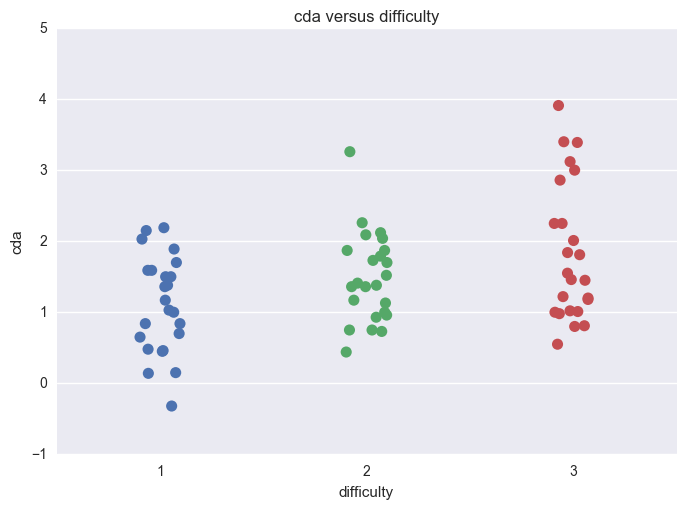

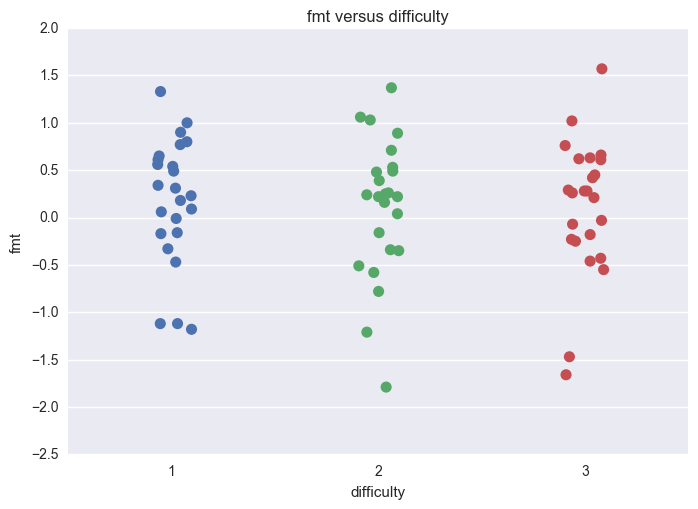

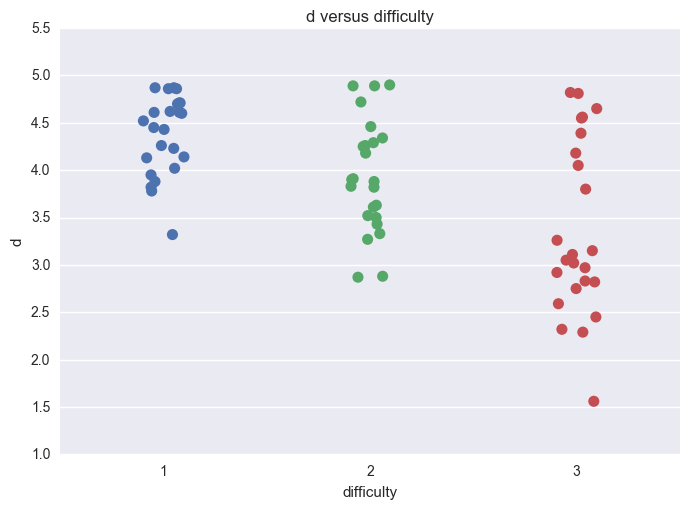

In [8]:
for measure in ["cda","fmt","d"]:
    plt.figure()
    sns.stripplot(data=pivotData[measure],s=8,jitter=True);
    plt.ylabel(measure)
    plt.title(measure+" versus difficulty")

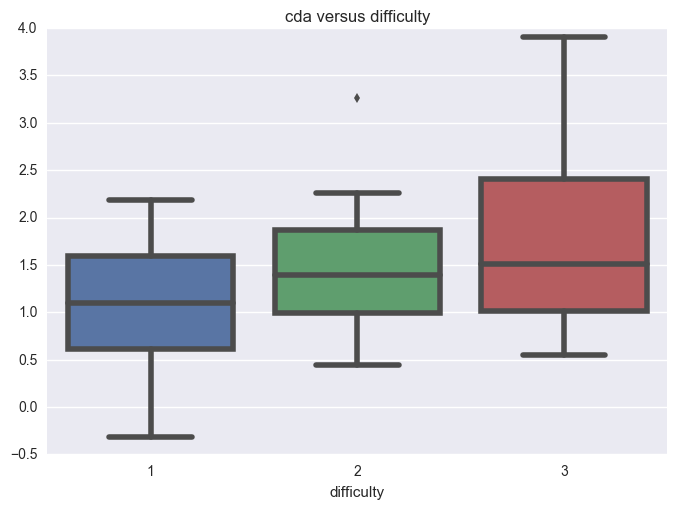

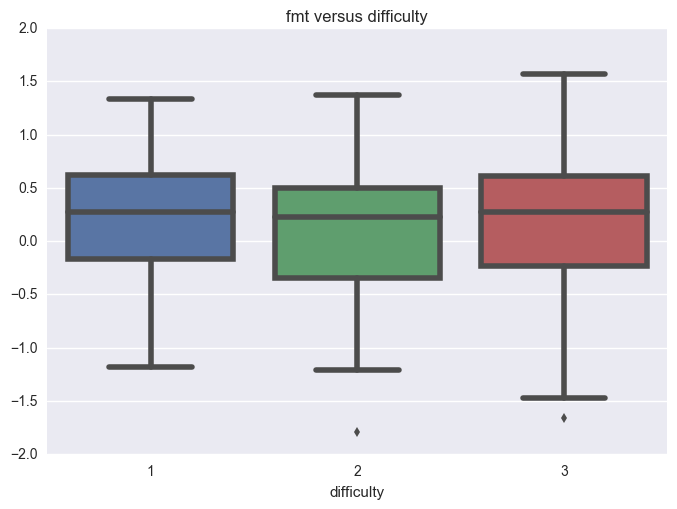

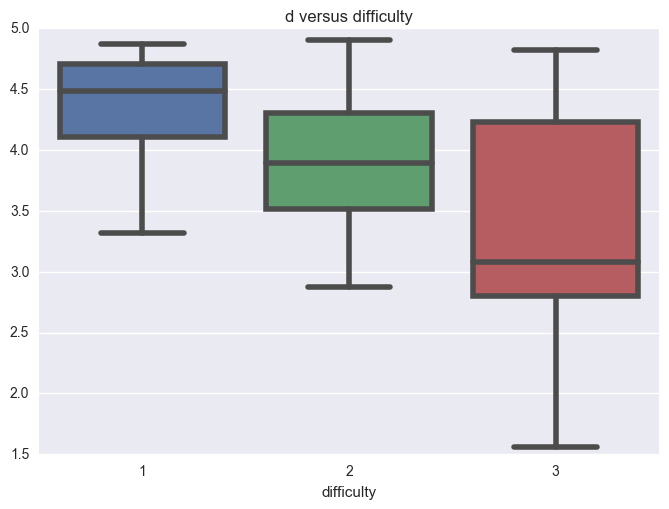

In [9]:
for measure in ["cda","fmt","d"]:
    plt.figure()
    sns.boxplot(data=pivotData[measure],#x="difficulty",y=measure,
                    linewidth=4);
    plt.title(measure+" versus difficulty")

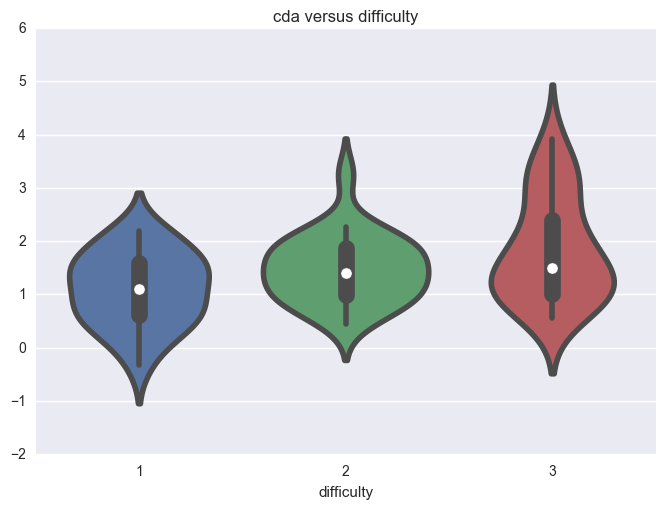

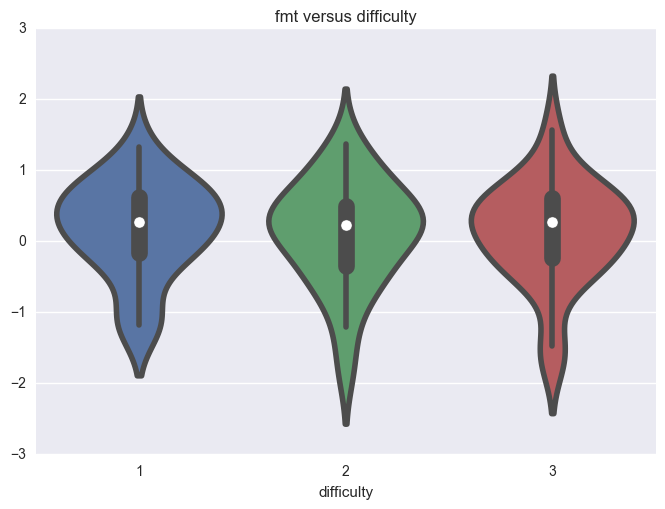

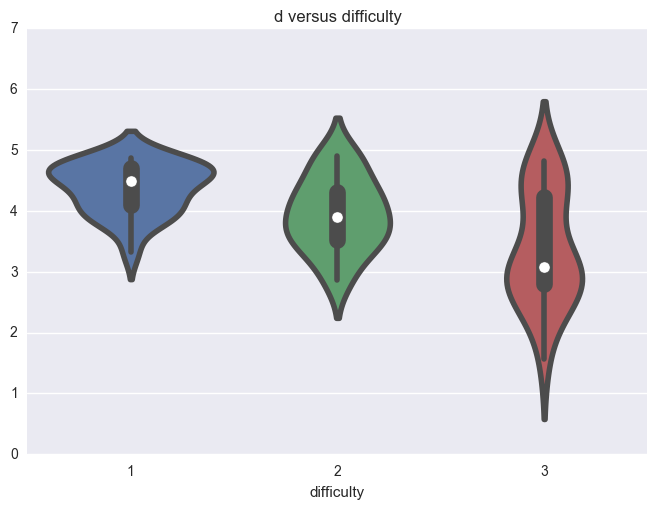

In [10]:
for measure in ["cda","fmt","d"]:
    plt.figure()
    sns.violinplot(data=pivotData[measure],#x="difficulty",y=measure,
                    linewidth=4);
    plt.title(measure+" versus difficulty")

Recall the assumptions behind ANOVA.

Based off of your visualization, do you think any of the assumptions of ANOVA are being violated for the case of fmt? What about d'?

## ANOVA the Easy Way

First, we'll use the built-in `scipy.stats` function `f_oneway` to perform ANOVA. This will be useful for checking your work in the next problem where you write your own "homebrew" ANOVA.

In [11]:
scipy.stats.f_oneway?

Try to organize the code you write in the cell below so that you minimize the amount you repeat yourself.

In [12]:
def runANOVA(data,measure):
    return scipy.stats.f_oneway(*[pivotData[measure,key] 
                       for key in pivotData[measure].columns])

In [13]:
# one way to do it

print("="*13)
for measure in ["cda","d","fmt"]:
    print("ANOVA for "+ measure)
    print(runANOVA(pivotData,measure))
    print("="*13)

ANOVA for cda
F_onewayResult(statistic=5.3606157825487184, pvalue=0.0068547347949886664)
ANOVA for d
F_onewayResult(statistic=13.162307279101022, pvalue=1.4378683792723512e-05)
ANOVA for fmt
F_onewayResult(statistic=0.073472594633349528, pvalue=0.92923420230558784)


In [14]:
# another good alternative

measure = "fmt"

scipy.stats.f_oneway(*[pivotData[measure,key] 
                       for key in pivotData[measure].columns])

F_onewayResult(statistic=0.073472594633349528, pvalue=0.92923420230558784)

## ANOVA the Hard Way

To get a better understanding of ANOVA, you'll now implement it from scratch.

To get started, you'll need the total number of observations $N$, the group size (here, each group is the same size), and the keys for each group (here, 1, 2, and 3, and they're stored in the second level of the column multi-index).

The first cell picks a measure to run ANOVA on. Make sure that the rest of the code runs properly when this cell is changed.

In [65]:
measure = "cda"

In [66]:
N = len(df[measure])
groupSize = len(pivotData[measure])
difficulties = pivotData.columns.levels[1]

First calculate the overall, or "grand" mean, then calculate each group's mean separately. We'll need these in order to compute the variances later.

In [67]:
grandMean = df[measure].mean()

groupMeans = pivotData[measure].mean()

Now, compute the explained and unexplained differences. The explained differences are the differences between the groups' averages and the overall average. The unexplained differences are the differences between the individual scores and the group averages. 

In [68]:
explainedDifferences = groupMeans-grandMean

unexplainedDifferences = [pivotData[measure,difficulty]-groupMeans[difficulty]
                             for difficulty in difficulties]

Now, write a sum-of-squares function using `np.sum` and `np.square` and then use it (and not, e.g., the difference of two other values) to compute the following sum of squares values:

- total sum of squares
- sum of squares explained by the model
- sum of squares not explained by the model

The assertion statements in the final code block can be used to check your work. Again, only use these differences to check your work, not to calculate any of the listed sum of squares values directly.

Also, calculate the sum of the grand mean squared and use it, along with the total sum of squares, to calculate the explainable sum of squares.

In [69]:
def SS(x):
    return np.sum(np.square(x))

In [70]:
SS(unexplainedDifferences)

41.554441666666669

In [71]:
SS(explainedDifferences)

0.26903067129629665

In [72]:
total_SS = SS(data[measure])

grandMean_SS = N*np.square(grandMean)

#how much of the sum of squares is left over when you take out the mean?
explainable_SS = (total_SS-grandMean_SS)

unexplained_SS = SS(unexplainedDifferences)

explained_SS = groupSize*SS(explainedDifferences)

In [73]:
#these should be the same, except for computer rounding error

assert( total_SS - (grandMean_SS+explainable_SS) <= 1e-4 )

assert( explainable_SS - (explained_SS+unexplained_SS) <= 1e-4 )

Now, calculate the following degrees of freedom in this model:

- total degrees of freedom
- the degrees of freedom of the model (or explained degrees of freedom)
- the "leftover" degrees of freedom (or the unexplained degrees of freedom)

The latter two should add up to $N-1$. Where does the other degree of freedom "go"?

In [74]:
# k is the number of groups
k = len(difficulties)

total_df = N
mean_df = 1
explained_df = k - 1
unexplained_df = N - k

In [75]:
assert(total_df == (mean_df+explained_df+unexplained_df))

Now, we calculate our estimate for the mean square of the explained and unexplained components. Note that, because we are estimating a value, we want to use the appropriate degree of freedom instead of the raw $N$ for each average.

In [76]:
explained_MS = explained_SS/explained_df
unexplained_MS = unexplained_SS/unexplained_df

The mean square of the explained component tells us how much, on average, our hypothesis is able to improve, in terms of squared error, our guess of the value of our outcome variable over the "null" hypothesis. The bigger this is, the more supported our hypothesis is, and the less likely we are to have observed such a result if the null hypothesis were true.

However, a mean square value by itself doesn't tell you much  -- is reduction of 2 in mean squared error a "big" improvement? For our data, it would be, but for data with units in the billions and spread in the millions, it would not be. Therefore, if we want a statistic that tells us how good our hypothesis is, we need to somehow take into account the amount of unexplained variance.

The statistic used for this purpose in ANOVA is the *F-statistic*, named in honor of its inventor, [Sir Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher). Compute the value of F for this data below.

In [77]:
F = explained_MS/unexplained_MS

F

5.3606157825487228

### Calculating p

To interpret this F value and so determine if the amount of variance we were able to explain is close to what one would expect by chance, we need to get a hold of the sampling distribution of the F-statistic. Once we have that, we can calculate the area under the curve from the observed value on up and use that to determine our p-value.

Why do we only calculate a "one-tailed" area, above our value, rather than a "two-tailed" area? 

We have two options for acquiring the sampling distribution of F:

1. Use a pre-calculated distribution In the old days, that'd mean looking up values in a table in a reference text. These days, statistical computing libraries like `scipy` provide this service via functions.
1. Simulate what our data would look like under the null hypothesis and use the distribution of the F-statistic from our simulations to approximate the true distribution of F

We'll take the second road.
This will involve a [*resampling*](https://en.wikipedia.org/wiki/Resampling_%28statistics%29) technique called an
[*approximate permutation test*](https://en.wikipedia.org/wiki/Resampling_%28statistics%29#Monte_Carlo_testing).
It is closely related to [exact tests](https://en.wikipedia.org/wiki/Exact_test),
which are covered in the Chapter 7 of *Intuitive Biostatistics*.

Explain, in your own words, what the null hypothesis of the ANOVA test is.

Under the null hypothesis of ANOVA, what can we say about the relationship between the independent variable and the dependent variable? 

Based on this relationship, how could we simulate what our data would look like under the null hypothesis? That is, how could we generate data that is distributed according to the null hypothesis?

The function `utils.estimate_f_distribution` will implement this simulation.

In [78]:
measure = "cda"

groupedData = utils.groupData(pivotData,measure,difficulties)

fs = utils.estimate_f_distribution(groupedData)

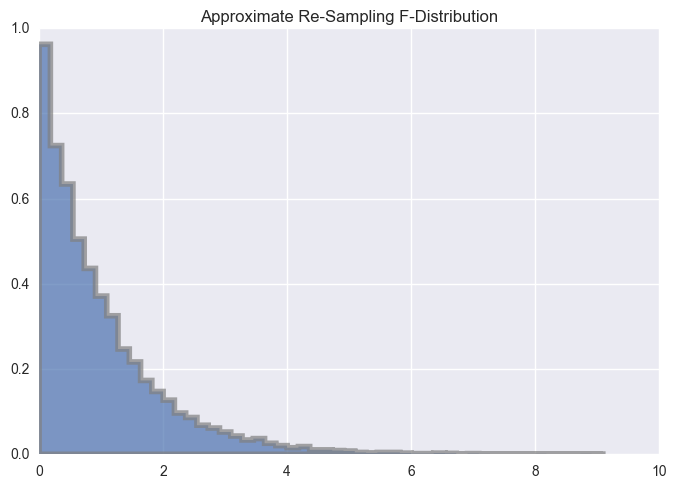

In [79]:
utils.plotApproximatedF(fs)

Using the `sortedFs` array, calculate an approximate p-value for the value of F you calculated above. Check your work by comparing it to the value provided by `scipy.stats.f_oneway`

In [80]:
def eCDF(f,sortedFs):
    try:
        index = np.where(sortedFs > f)[0][0] #returns a tuple of arrays, we want first element of first array
    except IndexError:
        index = len(sortedFs)
        
    return index/len(sortedFs)

myP = 1-eCDF(F,sorted(fs))
       
_,theirP = runANOVA(pivotData,measure)
       
(theirP - myP)**2

2.4172002827485394e-06

As part of the process of generating our estimated F distribution, we need to generate a bunch of data sets that were distributed according to the null hypothesis. We can use these, plus any method that calculates p-values, to simulate the distribution of p-values under the null hypothesis. The function `utils.simulateNull` will do this for us.

In [81]:
ps = utils.simulateNull(groupedData,N=10000)

What sampling distribution do we expect the p-value to have under the null hypothesis? How might this distribution look different under the alternative hypothesis?

In the cell below, plot the simulated sampling distribution of the p-value.

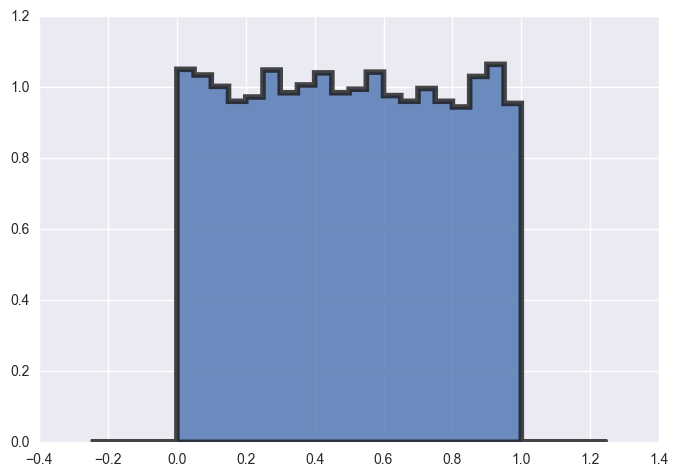

In [82]:
sns.distplot(ps,bins=np.arange(-0.25,1.3,0.05),kde=False,
             hist_kws={'histtype':'stepfilled',
                       'normed':True,
                       'linewidth':4,
                       'alpha':0.8});

## Beyond p - $\eta^2$ and $\omega^2$

The F-statistic is used to determine the statistical significance of an ANOVA result. How is this different from the practical or scientific significance of an ANOVA result?

The APA recommends that, in addition to reporting F and p, scientists report the value $\eta^2$, which is equal to the ratio of the explained sum-of-squares to the explainable sum-of-squares. It's also known as the *variance explained*.

Why is this number closer to a notion of practical significance?

Calculate $\eta$ for a statistically significant test you ran above.

In [59]:
eta = explained_SS/explainable_SS
eta

0.27615757672042696

Does this seem like a practically significant fraction to you? Look back at the visualizations of the data you produced at the beginning of the lab. Are there any visual hints that would lead you to expect a value of $\eta^2$ close to what you calculated?

Notice that $\eta$ uses the sums-of-squares, rather than mean squares. This makes it a biased estimator of the quantity it is trying to capture: it overestimates how much variance has been explained. Intuitively, it only caputres how well you explained your dataset, not how well you might explain additional data from the same population.

An unbiased estimator for explained variance exists, known as $\omega^2$ (pronounced "omega-squared"). You can [read more about it here](http://daniellakens.blogspot.com/2015/06/why-you-should-use-omega-squared.html).

Use the following formula to compute $\omega^2$ for your test:

$$
    \omega^2 = \frac{F-1}{\frac{F+1+\text{df}_{unexplained}}{\text{df}_{explained}}}
$$

In [83]:
om_sqrd = (F-1)/((F+unexplained_df+1)/ explained_df )
om_sqrd

0.11572664945125122

Does this more accurate estimate change your opinion of the the practical significance of the results of your test?